# Bar

In [2]:
import pandas as pd
import sqlite3

We have another question for you to answer: when do our users usually commit the labs: in the night, morning, afternoon, or evening? And how has it changed over time?

In [3]:
conn = sqlite3.connect("../../data/checking-logs.sqlite")

In [4]:
query = '''
    SELECT timestamp
    FROM checker
    WHERE uid LIKE "user_%"
'''
times = pd.io.sql.read_sql(query, conn, parse_dates="timestamp")

In [5]:
times["date"] = times["timestamp"].dt.date
times["hour"] = times["timestamp"].dt.hour
times["daytime"] = pd.cut(times["hour"], bins = [0, 3, 9, 16, 23],
        include_lowest=True,
        labels=["night", "morning", "afternoon", "evening"])

In [19]:

final = times[["date", "daytime"]].groupby("date").agg(
        night = ("daytime", lambda x: (x == "night").sum()),
        morning = ("daytime", lambda x: (x == "morning").sum()),
        afternoon = ("daytime", lambda x: (x == "afternoon").sum()),
        evening = ("daytime", lambda x: (x == "evening").sum())
    )

<Axes: xlabel='date'>

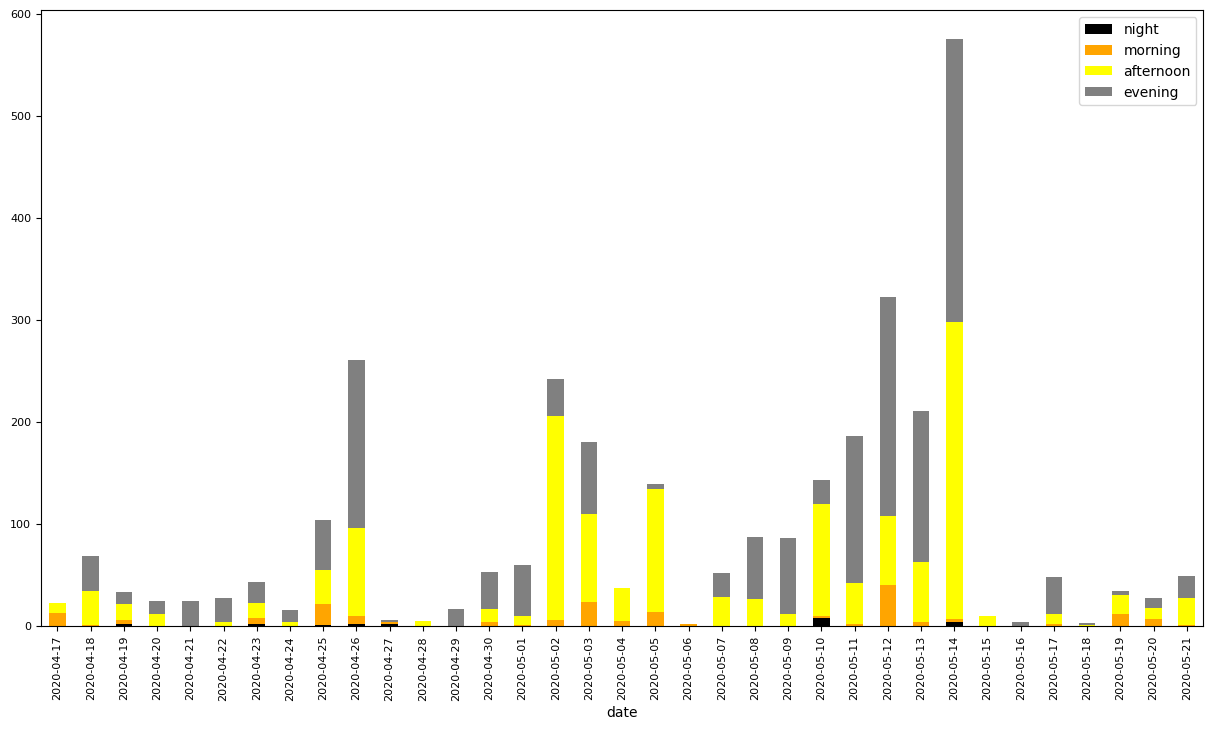

In [37]:
final.plot(kind = "bar", stacked = True, figsize = (15, 8), fontsize = 8, color = ['black', 'orange', 'yellow', 'gray'])

In [36]:
conn.close()

People usually commit in the afternoon and evening

2020-05-14 has the most number of commits
2020-05-12 - and at the same time, the number of commits in the evening is higher than in the afternoon